<a href="https://colab.research.google.com/github/philippan2015/demo_traffic_jam_prediction/blob/master/demo_traffic_jam_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
import pickle

In [0]:
!git clone https://github.com/wshuyi/demo_traffic_jam_prediction.git

Cloning into 'demo_traffic_jam_prediction'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [0]:
from pathlib import Path
data_dir = Path('demo_traffic_jam_prediction')

In [0]:
with open(data_dir / 'data.pickle', 'rb') as f:
    [event_dict, df] = pickle.load(f)

In [8]:
event_dict

{1: 'road closed due to construction',
 2: 'traffic jam',
 3: 'stopped car on the shoulder',
 4: 'road closed',
 5: 'other',
 6: 'object on roadway',
 7: 'major event',
 8: 'pothole',
 9: 'traffic heavier than normal',
 10: 'road construction',
 11: 'fog',
 12: 'accident',
 13: 'slowdown',
 14: 'stopped car',
 15: 'small traffic jam',
 16: 'stopped traffic',
 17: 'heavy traffic',
 18: 'minor accident',
 19: 'medium traffic jam',
 20: 'malfunctioning traffic light',
 21: 'missing sign on the shoulder',
 22: 'animal on the shoulder',
 23: 'animal struck',
 24: 'large traffic jam',
 25: 'hazard on the shoulder',
 26: 'hazard on road',
 27: 'ice on roadway',
 28: 'weather hazard',
 29: 'flooding',
 30: 'road closed due to hazard',
 31: 'hail',
 32: 'huge traffic jam'}

In [9]:
df.head(10)

,label,events
0,1,"[traffic heavier than normal, heavy traffic, m..."
1,1,"[traffic jam, road construction, stopped car o..."
2,1,[traffic jam]
3,1,[traffic jam]
4,1,"[traffic jam, traffic jam, traffic jam, traffi..."
5,1,"[stopped car on the shoulder, traffic jam, hea..."
6,1,"[stopped car on the shoulder, traffic jam, hea..."
7,1,"[traffic jam, small traffic jam, traffic jam, ..."
8,1,"[heavy traffic, traffic jam, traffic jam, stop..."
9,1,"[heavy traffic, traffic jam, traffic jam, stop..."


In [0]:
df.tail(10)

,label,events
851,0,"[traffic jam, traffic jam, traffic jam]"
852,0,"[stopped traffic, traffic jam, stopped traffic]"
853,0,"[stopped car on the shoulder, stopped traffic,..."
854,0,[stopped traffic]
855,0,"[stopped car on the shoulder, stopped car on t..."
856,0,"[heavy traffic, heavy traffic, heavy traffic, ..."
857,0,"[traffic jam, traffic jam]"
858,0,"[traffic jam, traffic jam, traffic heavier tha..."
859,0,"[heavy traffic, stopped car on the shoulder, t..."
860,0,"[heavy traffic, stopped car on the shoulder, s..."


In [10]:
max_len_event_id = df.events.apply(len).idxmax()
max_len_event_id

105

In [11]:
max_len_event = df.iloc[max_len_event_id]
max_len_event.events

['stopped car on the shoulder',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'slowdown',
 'stopped traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'stopped car on the shoulder',
 'traffic jam',
 'heavy traffic',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'traffic jam',
 'stopped car on the shoulder',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'heavy traffic',
 'stopped traffic',
 'traffic heavier than normal',
 'pothole',
 'stopped car on the shoulder',
 'traffic jam',
 'slowdown',
 'stopped traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'traffic jam',
 'traffic jam',
 'stopped car on the shoulder',
 'major event',
 'traffic jam',
 'traffic jam',
 'stopped traffic',
 'heavy traffic',
 'traffic heavie

In [12]:
maxlen = len(max_len_event.events)
maxlen

84

In [0]:
reversed_dict = {}
for k, v in event_dict.items():
  reversed_dict[v] = k

In [14]:
reversed_dict

{'accident': 12,
 'animal on the shoulder': 22,
 'animal struck': 23,
 'flooding': 29,
 'fog': 11,
 'hail': 31,
 'hazard on road': 26,
 'hazard on the shoulder': 25,
 'heavy traffic': 17,
 'huge traffic jam': 32,
 'ice on roadway': 27,
 'large traffic jam': 24,
 'major event': 7,
 'malfunctioning traffic light': 20,
 'medium traffic jam': 19,
 'minor accident': 18,
 'missing sign on the shoulder': 21,
 'object on roadway': 6,
 'other': 5,
 'pothole': 8,
 'road closed': 4,
 'road closed due to construction': 1,
 'road closed due to hazard': 30,
 'road construction': 10,
 'slowdown': 13,
 'small traffic jam': 15,
 'stopped car': 14,
 'stopped car on the shoulder': 3,
 'stopped traffic': 16,
 'traffic heavier than normal': 9,
 'traffic jam': 2,
 'weather hazard': 28}

In [0]:
def map_event_list_to_idxs(event_list):
  list_idxs = []
  for event in (event_list):
    idx = reversed_dict[event]
    list_idxs.append(idx)
  return list_idxs

In [0]:
map_event_list_to_idxs(max_len_event.events)

In [17]:
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [18]:
len(event_dict)

32

In [19]:
df.events.apply(map_event_list_to_idxs)

0      [9, 17, 18, 14, 13, 17, 3, 13, 16, 3, 17, 17, ...
1                                             [2, 10, 3]
2                                                    [2]
3                                                    [2]
4                               [2, 2, 2, 2, 2, 2, 2, 9]
5                                             [3, 2, 17]
6                                             [3, 2, 17]
7                        [2, 15, 2, 17, 2, 2, 13, 17, 2]
8                                  [17, 2, 2, 16, 17, 2]
9                                  [17, 2, 2, 16, 17, 2]
10     [17, 16, 17, 2, 17, 3, 17, 17, 16, 17, 16, 18,...
11                                                  [17]
12                                                  [17]
13                                              [24, 24]
14                                    [24, 2, 24, 24, 2]
15                                    [24, 2, 24, 24, 2]
16     [2, 10, 2, 2, 2, 18, 16, 16, 7, 2, 16, 2, 2, 9...
17     [2, 10, 2, 2, 2, 18, 16,

In [20]:
sequences = df.events.apply(map_event_list_to_idxs).tolist()
sequences[:5]

[[9,
  17,
  18,
  14,
  13,
  17,
  3,
  13,
  16,
  3,
  17,
  17,
  16,
  3,
  16,
  17,
  9,
  17,
  2,
  17,
  2,
  7,
  16,
  17,
  17,
  17,
  17,
  13,
  5,
  17,
  9,
  9,
  16,
  16,
  3],
 [2, 10, 3],
 [2],
 [2],
 [2, 2, 2, 2, 2, 2, 2, 9]]

In [21]:
data = pad_sequences(sequences, maxlen=maxlen)
data

array([[ 0,  0,  0, ..., 16, 16,  3],
       [ 0,  0,  0, ...,  2, 10,  3],
       [ 0,  0,  0, ...,  0,  0,  2],
       ...,
       [ 0,  0,  0, ..., 17,  2,  2],
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  3,  3,  2]], dtype=int32)

In [0]:
labels = np.array(df.label)

In [0]:
np.random.seed(12)

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [0]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [0]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [27]:
X_train

array([[ 0,  0,  0, ..., 15, 15,  3],
       [ 0,  0,  0, ...,  0,  2,  2],
       [ 0,  0,  0, ...,  0,  0, 16],
       ...,
       [ 0,  0,  0, ...,  2, 15, 16],
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  0,  0,  2]], dtype=int32)

In [0]:
num_events = len(event_dict) + 1

In [0]:
embedding_dim = 20
embedding_matrix = np.random.rand(num_events, embedding_dim)

In [30]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [32]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_untrainable.h5")

Instructions for updating:
Use tf.cast instead.
Train on 1377 samples, validate on 345 samples
Epoch 1/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.6811 - acc: 0.5614 - val_loss: 0.6795 - val_acc: 0.5826
Epoch 2/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.6527 - acc: 0.6100 - val_loss: 0.6563 - val_acc: 0.6261
Epoch 3/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.6276 - acc: 0.6652 - val_loss: 0.6893 - val_acc: 0.5478
Epoch 4/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.6110 - acc: 0.6790 - val_loss: 0.6952 - val_acc: 0.5855
Epoch 5/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.5948 - acc: 0.6855 - val_loss: 0.6045 - val_acc: 0.6986
Epoch 6/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.5949 - acc: 0.6870 - val_loss: 0.6401 - val_acc: 0.6261
Epoch 7/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.5763 - acc: 0.7030 - va

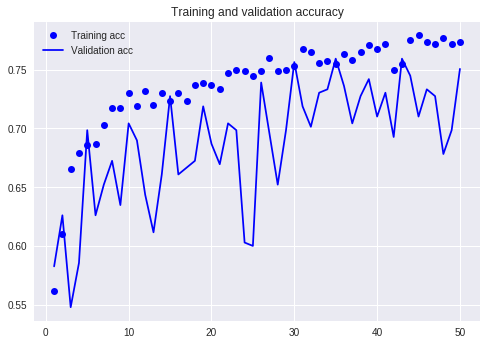

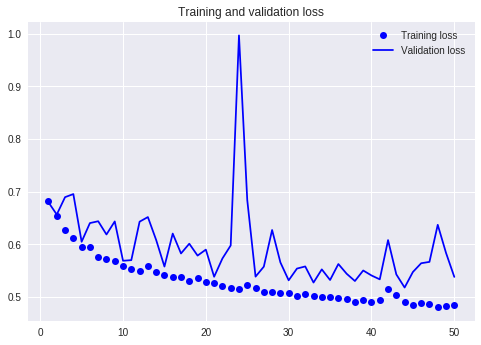

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_trainable.h5")

Train on 1377 samples, validate on 345 samples
Epoch 1/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.6809 - acc: 0.5839 - val_loss: 0.6630 - val_acc: 0.6261
Epoch 2/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.6393 - acc: 0.6543 - val_loss: 0.6647 - val_acc: 0.5739
Epoch 3/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.6037 - acc: 0.6899 - val_loss: 0.8371 - val_acc: 0.5246
Epoch 4/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.5818 - acc: 0.7182 - val_loss: 0.5823 - val_acc: 0.6957
Epoch 5/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.5658 - acc: 0.7255 - val_loss: 0.5529 - val_acc: 0.7217
Epoch 6/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.5809 - acc: 0.7044 - val_loss: 0.5515 - val_acc: 0.7362
Epoch 7/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.5458 - acc: 0.7364 - val_loss: 0.8388 - val_acc: 0.5246
Epoch 8/50
1377

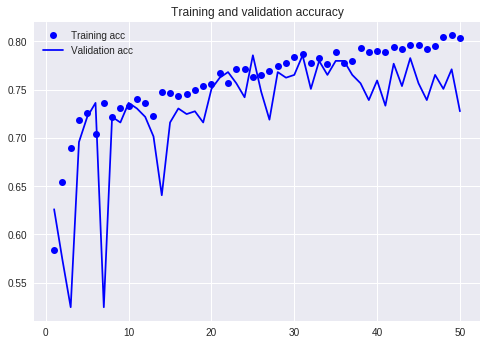

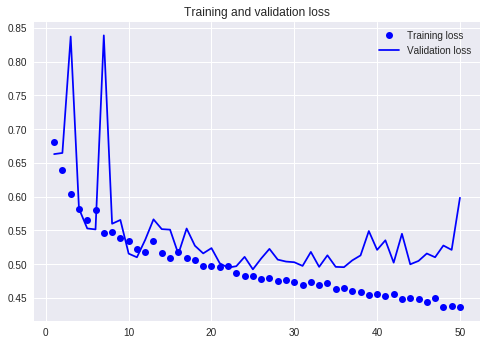

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_trainable_with_dropout.h5")

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 1377 samples, validate on 345 samples
Epoch 1/50
1377/1377 [==============================] - 4s 3ms/step - loss: 0.6757 - acc: 0.5839 - val_loss: 0.6603 - val_acc: 0.5652
Epoch 2/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.6461 - acc: 0.6289 - val_loss: 0.6386 - val_acc: 0.6841
Epoch 3/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.6401 - acc: 0.6391 - val_loss: 0.6358 - val_acc: 0.6319
Epoch 4/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.6231 - acc: 0.6521 - val_loss: 0.6510 - val_acc: 0.6029
Epoch 5/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.6067 - acc: 0.6776 - val_loss: 0.6205 - val_acc: 0.6348
Epoch 6/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.5986 - acc: 0.6812 - val_loss: 0.5975 - val_acc: 0.6609
Epoch 7/50
1377/1377 [============

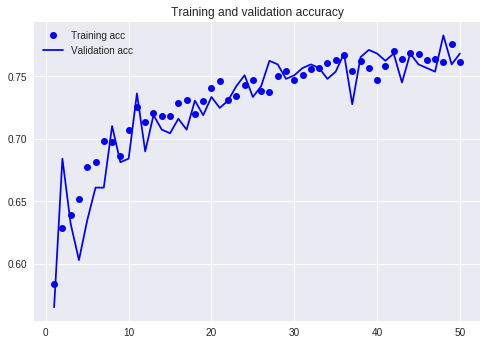

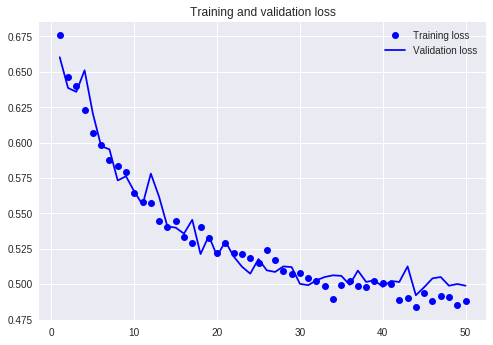

In [38]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()